# Анализ медицинских данных
## Задание 1. Подготовка окружения и знакомство с данными

Установила библиотеки: numpy, pandas, matplotlib, seaborn, scipy, statsmodels, jupyter.

In [32]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn
import scipy
import statsmodels
import csv
import jupyter

### Метод head(). Первые строчки датасета

In [28]:
clinical_data = pd.read_csv("clinical_trial_data.csv")

print(clinical_data.head())


   PatientID    Group      Score
0          1  Placebo  60.870471
1          2     Drug  63.997831
2          3  Placebo  60.917608
3          4  Placebo  40.124311
4          5  Placebo  57.803281


###  Метод info()

Используя данный метод мы выяснили, что таблица состоит из трех столбов: 
PatientID - все данные типа int 
Group - данные типа object (строки), группа принимаемого препарата лекарство/плацебо
Score - данные типа float, оценка самочувствия

200 non-null данных: нет пропущенных значений

In [42]:
clinical_data = pd.read_csv("clinical_trial_data.csv")
df = pd.DataFrame(clinical_data)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  200 non-null    int64  
 1   Group      200 non-null    object 
 2   Score      200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB
None


### Метод describe()

Пропущенных значений (count) - 0
Среднее арифметическое (mean) по столбцу Score - 65.27, означает среднюю оценку самочувствия пациентов
Стандартное отклонение (std) - 11.09, показывет насколько далеко отдельные значения в наборе данных отклоняются от среднего, в среднем паценрты оценивают свое состояние как 54-76
Минимум (min) - 11.09
Первый квартиль, Q1 (25%) - 58.02, 25% пациентов оценивают самочувствие на 58 и ниже
Второй квартиль, Q2 (50%) - 65.14, 50% пациентов оценивают самочувствие на 65 и ниже 
Второй квартиль, Q3 (75%) - 72.50, 75% пациентов оценивают самочувствие y 72 и ниже 
Максимальное значение (max) - 98.53

Первый столбец PatientID не дает репрезентативных данных, так как несет за собой порядковые номера от 1 до 200 пациентов 

In [46]:
clinical_data = pd.read_csv("clinical_trial_data.csv")
df = pd.DataFrame(clinical_data)

print(df.describe())

        PatientID       Score
count  200.000000  200.000000
mean   100.500000   65.267600
std     57.879185   11.088616
min      1.000000   39.748574
25%     50.750000   58.021821
50%    100.500000   65.135267
75%    150.250000   72.504527
max    200.000000   98.527315


## Задание 2. Визуальный анализ

### Гистограмма

#### Построение гистограммы: 
Рассчет количества бинов: 
По правилу Стерджеса
k = 1 + 3.322 × log10(n)

#### Анализ гистограмм
Группа, принимающая плацебо: 
1. Форма распределения:
Логнормальное распределение
2. Центральная тенденция:
  •  Мода: Самый высокий столбец (бин) на гистограмме: в диапозоне между 62-68, частота ~27
  •  Медиана: Центральное значение распределения: ближе к 60-65
3. Разброс (вариабельность):
  •  Ширина распределения: 40 < x < 100
  •  Стандартное отклонение: в предлах нормы +- 10%
  •  Межквартильный размах (IQR): Наблюдается отклонение в сторону первого квартиля, значения в среднем 45-50
4. Частота и KDE
   • унимодальное распределение, один пик, разница между вторым и третим бином не достаточно большая для того, скорость роста меньше относительно остальных бинов
   • на значении ближе к 100 заметен локальный максмимум
    
Группа, принимающая препарат: 
1. Форма распределения:
Нормальное распределение
2. Центральная тенденция:
  •  Мода: Самый высокий столбец (бин) на гистограмме: в диапозоне между 70-75, частота ~23
  •  Медиана: Центральное значение распределения: ближе к 70-73 
3. Разброс (вариабельность):
  •  Ширина распределения: 43 < x < 95
  •  Стандартное отклонение: в предлах нормы +- 10%
  •  Межквартильный размах (IQR): явных отклонений не выявила
4. Частота и KDE
   • унимодальное распределение

Оба графика: 
В результате интерпретации двух графиков, видно, что в среднем люди в группе с препаратом чувстуют себя лучше, однако в группе с плацебо больше людей, которые оценивают свое состояние на 60-65. Оба графика имеют одинаковую ширину, в 2 раза больше пациентов в группе с плацебо чувствуют себя на <40, высота столбцов 5 и 10


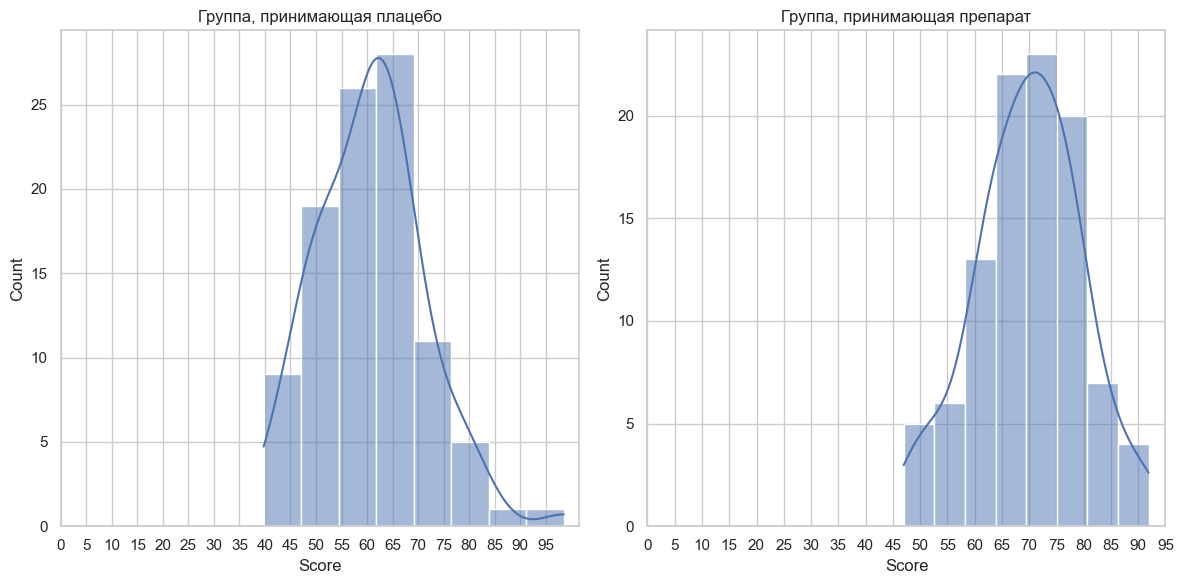

In [170]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import math


clinical_data = pd.read_csv("clinical_trial_data.csv")
df = pd.DataFrame(clinical_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
grouped = df.groupby('Group')
df_placebo =  grouped.get_group('Placebo')
df_drug =  grouped.get_group('Drug')

num_rows_drug = len(df_drug) #100
num_rows_placebo = len(df_placebo) #100
 
bin_drug = round(1 + 3.322* (math.log(100, 10))) #8
bin_placebo = round(1 + 3.322* (math.log(100, 10))) #8

ax = sns.histplot(data=df_placebo, x='Score', kde=True, bins=bin_placebo, ax=axs[0])
axs[0].set_title('Группа, принимающая плацебо')
x_ticks = np.arange(0, 100, 5)
ax.set_xticks(x_ticks)

ax1 = sns.histplot(data=df_drug, x='Score', kde=True, bins=bin_drug, ax=axs[1])
axs[1].set_title('Группа, принимающая препарат')
x_ticks1 = np.arange(0, 100, 5)
ax1.set_xticks(x_ticks1)

plt.tight_layout()
plt.show()

### Boxplot 

Видно, что группа на плацебо чувствует себя хуже: максимальная оценка ~85, когда на препаратах ~92. Медианы у плацебо ~61, у препаратов ~70. 
В среднем состояние у группы плацебо 53-67, а с препаратом 64-77

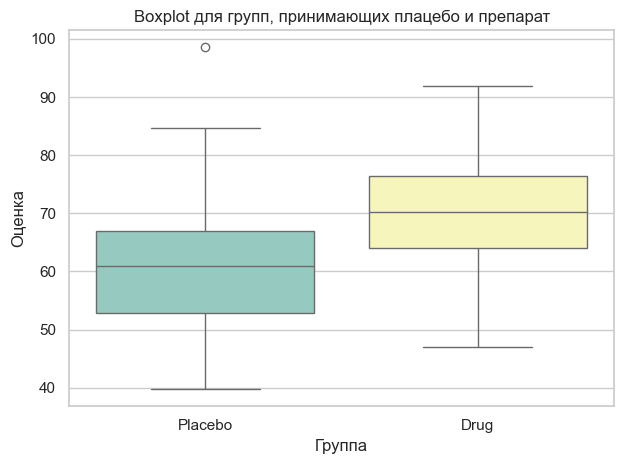

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

clinical_data = pd.read_csv("clinical_trial_data.csv")
df = pd.DataFrame(clinical_data)

sns.set(style="whitegrid")

# Строим boxplot
ax = sns.boxplot(x="Group", y="Score", hue="Group", data=df, palette="Set3")

legend = ax.get_legend()
if legend:
    legend.remove()

ax.set_ylabel('Оценка')
# Подписываем оси и добавляем заголовок
ax.set_xlabel('Группа')
ax.set_title('Boxplot для групп, принимающих плацебо и препарат')

plt.tight_layout()
plt.show()

## Задание 3. Математическая статистика и проверка гипотезы

### Гипотеза нормальности распределения: тест Шапиро — Уилка

In [196]:
from scipy.stats import shapiro
import numpy as np


clinical_data = pd.read_csv("clinical_trial_data.csv")
df = pd.DataFrame(clinical_data)

df_drug = df[df['Group'] == 'Drug']['Score']
df_placebo = df[df['Group'] == 'Placebo']['Score']

print('Группа плацебо:')
statistic, pvalue = scipy.stats.shapiro(df_placebo)

print(f'Statistic: {statistic:.3f}, p-value: {pvalue:.3f}')
if pvalue > 0.05:
    print("Данные предположительно имеют нормальное распределение.")
else:
    print("Данные предположительно не имеют нормального распределения.")
    
print('-' * 60)

print('Группа препарата:')
statistic, pvalue = scipy.stats.shapiro(df_drug)

print(f'Statistic: {statistic:.3f}, p-value: {pvalue:.3f}')
if pvalue > 0.05:
    print("Данные (нормальное распределение), вероятно, следуют нормальному распределению (не отклоняем H0)")
else:
    print("Данные (нормальное распределение), вероятно, не следуют нормальному распределению (отклоняем H0)")


Группа плацебо:
Statistic: 0.981, p-value: 0.152
Данные предположительно имеют нормальное распределение.
------------------------------------------------------------
Группа препарата:
Statistic: 0.989, p-value: 0.618
Данные (нормальное распределение), вероятно, следуют нормальному распределению (не отклоняем H0)


#### Вывод:
Данные имеют нормальное распределение, p-value > 0,05

### Проверка гомогенности дисперсий: тест Левена для проверки равенства дисперсий между группами.

Тест Левена — это статистический тест, который проверяет, являются ли дисперсии (разброс) данных в нескольких группах примерно одинаковыми. Он используется для проверки одного из предположений, необходимых для многих статистических методов. 

Интерпретация: 
Так как p-значение (0.538) больше, чем уровень значимости (0.05), мы не отклоняем нулевую гипотезу. Другими словами, нет статистически значимых доказательств того, что дисперсии оценок состояния пациентов в группе, принимающей препарат, и в группе, принимающей плацебо, отличаются.

Равномерный разброс оценок: Результат теста Левена говорит о том, что разброс (вариабельность) оценок состояния пациентов примерно одинаков в обеих группах. Это значит, что оценки состояния в группе, принимающей препарат, не более или менее разбросаны относительно своего среднего значения, чем оценки состояния в группе, принимающей плацебо.

In [ ]:
from scipy.stats import levene
import numpy as np
import pandas as pd

clinical_data = pd.read_csv("clinical_trial_data.csv")
df = pd.DataFrame(clinical_data)

df_drug = df[df['Group'] == 'Drug']['Score']
df_placebo = df[df['Group'] == 'Placebo']['Score']

stat, p = levene(df_drug, df_placebo)
print(f"Тест Левена: статистика={stat:.3f}, p-значение={p:.3f}")

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if p > alpha:
    print("Дисперсии, вероятно, равны (не отклоняем H0)")
else:
    print("Дисперсии, вероятно, не равны (отклоняем H0)")

In [ ]:
from scipy.stats import levene
import numpy as np
import pandas as pd

clinical_data = pd.read_csv("clinical_trial_data.csv")
df = pd.DataFrame(clinical_data)

df_drug = df[df['Group'] == 'Drug']['Score']
df_placebo = df[df['Group'] == 'Placebo']['Score']

stat, p = levene(df_drug, df_placebo)
print(f"Тест Левена: статистика={stat:.3f}, p-значение={p:.3f}")

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if p > alpha:
    print("Дисперсии, вероятно, равны (не отклоняем H0)")
else:
    print("Дисперсии, вероятно, не равны (отклоняем H0)")

### Выбор и проведение статистического теста: t-тест

Так как данные нормально распределены и дисперсии равны, используем t-тест.

T-тест - параметрический тест, применяется, когда нужно понять, есть ли различия в среднем значении переменной между двумя группами наблюдений.

Интерпретация: 
Так как p-значение (0.000000001) меньше, чем уровень значимости (0.05), мы отклоняем нулевую гипотезу. Это означает, что есть статистически значимое доказательство того, что средние значения оценок состояния пациентов в группе, принимающей препарат, и в группе, принимающей плацебо, отличаются.

Так как мы сравниваете препарат с плацебо, этот результат предполагает, что препарат влияет на оценки состояния пациентов. Однако, мы не можем утверждать в рамках данного теста в какое направление меняется препарат, но исходя из визуальных тестов - в лучшую сторону.

In [5]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

clinical_data = pd.read_csv("clinical_trial_data.csv")
df = pd.DataFrame(clinical_data)

df_drug = df[df['Group'] == 'Drug']['Score']
df_placebo = df[df['Group'] == 'Placebo']['Score']

statistic, pvalue = ttest_ind(df_drug, df_placebo)

print(f'Statistic: {statistic:.3f}, p-value: {pvalue:.9f}')
if pvalue <= 0.05:
    print("Средние значения в группах статистически значимо отличаются.")
else:
    print("Средние значения в группах статистически не отличаются.")

Statistic: 6.403, p-value: 0.000000001
Средние значения в группах статистически значимо отличаются.


Интерпретация: 
Так как p-значение (0.538) больше, чем уровень значимости (0.05), мы не отклоняем нулевую гипотезу. Другими словами, нет статистически значимых доказательств того, что дисперсии оценок состояния пациентов в группе, принимающей препарат, и в группе, принимающей плацебо, отличаются.

Равномерный разброс оценок: Результат теста Левена говорит о том, что разброс (вариабельность) оценок состояния пациентов примерно одинаков в обеих группах. Это значит, что оценки состояния в группе, принимающей препарат, не более или менее разбросаны относительно своего среднего значения, чем оценки состояния в группе, принимающей плацебо.

### Оценка размера эффекта: вычисление коэффициента Коэна d для оценки размера эффекта.

Коэффициент Коэна (Cohen's d) — это мера размера эффекта, которая показывает, насколько велика разница между средними значениями двух групп, выраженная в единицах стандартного отклонения. Он является стандартизованной мерой и позволяет сравнивать размеры эффектов в различных исследованиях, даже если они используют разные шкалы измерения.

In [9]:
import numpy as np
from scipy.stats import ttest_ind
import pandas as pd


clinical_data = pd.read_csv("clinical_trial_data.csv")
df = pd.DataFrame(clinical_data)

df_drug = df[df['Group'] == 'Drug']['Score']
df_placebo = df[df['Group'] == 'Placebo']['Score']
def cohens_d(group1, group2):
    n1 = len(group1)
    n2 = len(group2)
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)
    std2 = np.std(group2, ddof=1)
    s_pooled = np.sqrt(((n1-1) * std1**2 + (n2-1) * std2**2) / (n1 + n2 - 2))
    d = (mean1 - mean2) / s_pooled
    return d

d = cohens_d(df_drug, df_placebo)

print(f"Коэффициент Коэна d: {d:.3f}")
# Интерпретация результатов
if abs(d) >= 0.8:
    print("Большой размер эффекта")
elif abs(d) >= 0.5:
    print("Средний размер эффекта")
elif abs(d) >= 0.2:
     print("Маленький размер эффекта")
else:
    print("Очень маленький размер эффекта или нет эффекта")

Коэффициент Коэна d: 0.906
Большой размер эффекта


Интерпретация: 

Коэффициент Коэна d = 0.906 можно интерпретировать как то, что препарат имеет достаточно выраженный эффект на оценку состояния пациентов. Различие между группами, по-видимому, не случайно, а обусловлено тем, что пациенты принимают препарат.
